## A small notebook to showcase how to use train the model on a dummy example

## CLEAR OUTPUT BEFORE COMMITING/PUSHING

In [1]:
import torch
import numpy as np
from net import CNN_LSTM
import matplotlib.pyplot as plt

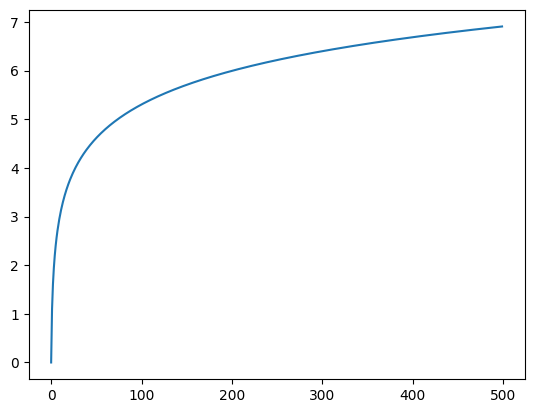

In [2]:
# generate sample data
data = np.log(np.linspace(1, 1000, 500)).reshape((1, 1, -1))
plt.plot(data[0, 0]);

### trying to predict the next day, given (all day - 1) points

In [3]:
# initialize the net and convert the data to a tensor
net = CNN_LSTM(2, 32, 64, 2, 100, 1, 1)
tensor_data = torch.tensor(data, dtype=torch.float32)

In [4]:
# initialize loss function and optimizer
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [5]:
# training
ITERATION_NUMBER = 30
for i, epoch in enumerate(range(ITERATION_NUMBER)):
    inputs, target = tensor_data[:, :, :499], tensor_data[:, :, -1]
    optimizer.zero_grad()

    output, h = net(inputs)
    l = loss(h[0], target)
    l.backward()
    optimizer.step()
    if i % 10 == 0:
        print(f"loss: {l.item()}")
print(f"real value: {tensor_data[:,:,499:].item()}")
print(f"predicted value: {net(tensor_data[:,:,:499])[1].item()}")

c:\Users\frede\OneDrive\Documents\Concordia\fall2022\comp432\project\.venv\lib\site-packages\torch\nn\modules\conv.py:309: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Convolution.cpp:896.)
  return F.conv1d(input, weight, bias, self.stride,


loss: 48.858909606933594
loss: 5.413939952850342
loss: 1.5683969259262085
real value: 6.907755374908447
predicted value: 7.545546531677246
